# An analysis of housing data in King County Washington.

### Presented by: Data Chef Partners

 Objective: To help realtors identify profitable areas in their chosen county so they can help their customers buy or sell with confidence<br>
#### Families:
- Get more house for their money
- Make an investment for future gains 
- Possible rental opportunities<br>
#### Contractors
- identify hotspots for flip opportunities
- identify areas of future development for new construction ventures
- Find customers looking to rennovate<br>
#### Investors
- Identify the gold standard of house for investment opportunities


### Setting up our workspace  
- Importing necessary libraries
- Importing custom helper functions

In [1]:
# Setting up the workspace by importing all of the necessary libraries.
from importlib import reload

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import folium
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn import metrics

import scipy.stats as stats
warnings.filterwarnings('ignore')
import helper_functions as hf
reload(hf)

<module 'helper_functions' from 'C:\\Users\\Owner\\Desktop\\Data Science\\Flatiron_Projects\\mod_1_project\\dsc-v2-mod1-final-project-online-ds-ft-090919\\helper_functions.py'>

# Loading the data

In [2]:
# Loading the data and getting a first look at it's structure and contents
df = pd.read_csv('kc_house_data.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [3]:
# Taking a look at the types of data and the information about the different columns
# Identifying extraneous values that may need to be removed or altered for cleaner processing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Initial Data impressions:<br>
- __*id*__ is simply an identifier<br>
    This will be removed as it is not pertinent to the data analysis.<br>
- __*date*__ is a string.<br>
    Our initial impression is that it reflects sale dates for the property.<br>
    This should be converted to a numerical value for processing.<br>
- There are two columns related to the size, __*sqft_living and sqft_lot*__ <br>
    We will explore their relationship and determine if they are dependent on each other or not<br>
- __*floors*__ is a numerical value.<br>
    Based on our knowledge of houses we believe this may be better suited to a categorical value.<br>
    We will explore the data and convert it to either a single or multiple<br> 
    or decide if each value of floors needs it's own category.<br>
- __*waterfront*__ is definitely categorical sine a home can only be either on or off the water.<br>
    We will convert this to a binary value to represent either on or off the water.<br>
- __*sqft_basement*__ <br>
    This along with __*sqft_above*__ combined are the same as __*sqft_living*__ so we will deal with it<br>
    since the presence of a basement is more significant than the size.<br>
    'sqft_basement will then be converted to categories which will identify the presence of a basement<br>
- __*zipcode*__ and __*lat*__ and __*long*__ are both location data.<br>
    We will determine if all are necessary and treat them accordingly<br>
- __*yr_renovated*__ has many null values so they will be used to create a new feature.<br>
    we will subtract it from the last date in the database and create __*ren_period*__


### Scrubbing the Data!!

*Waterfront*

In [5]:
# 'waterfront' is either True "1" or False "0".
# here we are changing all of the Null values to 0 to facilitate this
df['waterfront'] = df.waterfront.fillna(0)

*ID*

In [6]:
# 'id' is an arbitrary value which is unnecesary for analysis
# here we are removing it from the dataset
df.drop(['id'], axis=1, inplace=True)



*View*

In [7]:
# 'view' has some null values, so we will replace those with the assumption
#  that the null values represent the property not being viewed.
df['view'] = df.view.fillna(value = 0)

   *Sqft_basement*

In [8]:
# 'sqft_basement' has some placeholders. Here we are removing those
# This also needs to be converted to numerical values for analysis
df.sqft_basement.replace(to_replace='?', value='0', inplace=True)
df.sqft_basement = df.sqft_basement.fillna(value = 0)
df.sqft_basement = df.sqft_basement.convert_objects(convert_numeric=True)

In [9]:
df['yr_renovated'] = df.yr_renovated.fillna(value = 0)
df.yr_renovated = df.yr_renovated.replace(to_replace=0, value=df.yr_built)
    
        

In [10]:
df['ren_period'] = 2015-df.yr_renovated

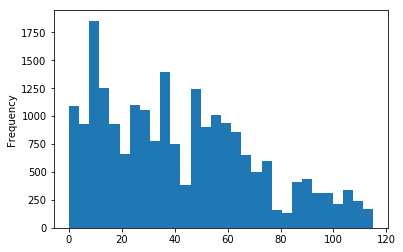

In [11]:
df.ren_period.plot(kind='hist', bins=30)

In [12]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ren_period
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1180,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650,60.0
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,24.0
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,770,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062,82.0
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1050,910.0,1965,1965.0,98136,47.5208,-122.393,1360,5000,50.0
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1680,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503,28.0


In [13]:
# converting to datetime for analysis
df['yr_renovated_dt'] = pd.to_datetime(df.yr_renovated.astype(int), format='%Y').dt.year
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ren_period,yr_renovated_dt
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650,60.0,1955
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,24.0,1991
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062,82.0,1933
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,910.0,1965,1965.0,98136,47.5208,-122.393,1360,5000,50.0,1965
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503,28.0,1987
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,...,1530.0,2001,2001.0,98053,47.6561,-122.005,4760,101930,14.0,2001
6,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,...,0.0,1995,1995.0,98003,47.3097,-122.327,2238,6819,20.0,1995
7,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,...,0.0,1963,1963.0,98198,47.4095,-122.315,1650,9711,52.0,1963
8,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,...,730.0,1960,1960.0,98146,47.5123,-122.337,1780,8113,55.0,1960
9,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,...,0.0,2003,2003.0,98038,47.3684,-122.031,2390,7570,12.0,2003


In [14]:
# converting 'date' to datetime format for processing
df['date_dt'] = pd.to_datetime(df.date)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ren_period,yr_renovated_dt,date_dt
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1955,1955.0,98178,47.5112,-122.257,1340,5650,60.0,1955,2014-10-13
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,24.0,1991,2014-12-09
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,1933,1933.0,98028,47.7379,-122.233,2720,8062,82.0,1933,2015-02-25
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1965,1965.0,98136,47.5208,-122.393,1360,5000,50.0,1965,2014-12-09
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1987,1987.0,98074,47.6168,-122.045,1800,7503,28.0,1987,2015-02-18


### Looking over the Clean, Shiny Data.

In [15]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ren_period,yr_renovated_dt
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,...,285.716581,1970.999676,1972.945131,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,42.054869,1972.945131
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,...,439.819830,29.375234,28.945393,53.513072,0.138552,0.140724,685.230472,27274.441950,28.945393,28.945393
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,...,0.000000,1900.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,1900.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,0.000000,1951.000000,1954.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,16.000000,1954.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,0.000000,1975.000000,1977.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,38.000000,1977.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,550.000000,1997.000000,1999.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,61.000000,1999.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,115.000000,2015.000000


## Saving cleaned DF as a CSV file for future use

In [16]:
df.to_csv("cleaned_kc_house_data.csv", index=False)

# Visualizing the Data

In [2]:
dff = pd.read_csv("cleaned_kc_house_data.csv")

In [3]:
# Taking an initial look at the basic statistics of the data set
dff.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ren_period,yr_renovated_dt,date_dt
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1955,1955.0,98178,47.5112,-122.257,1340,5650,60.0,1955,2014-10-13
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,24.0,1991,2014-12-09
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,1933,1933.0,98028,47.7379,-122.233,2720,8062,82.0,1933,2015-02-25
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1965,1965.0,98136,47.5208,-122.393,1360,5000,50.0,1965,2014-12-09
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1987,1987.0,98074,47.6168,-122.045,1800,7503,28.0,1987,2015-02-18


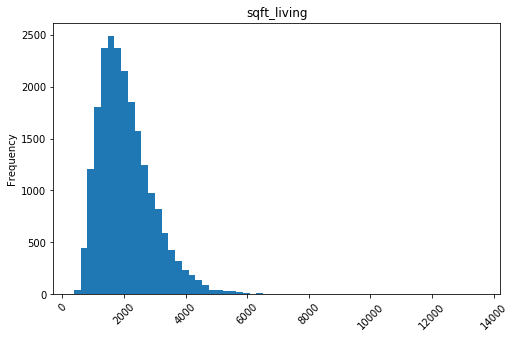

In [4]:
dff.sqft_living.plot(kind='hist', bins=60, title='sqft_living', figsize=(8,5), rot='45')

in the histogram above:
- __*sqft_living*__ as graphed above seems to indicate that the majority of the houses in this
    dataset are between 1000 sqft and 3000 sqft.
- There is a large amount between 3000 and 4500 which may be significant
- The distribution is not normal, and is skewed to the left with a long tail

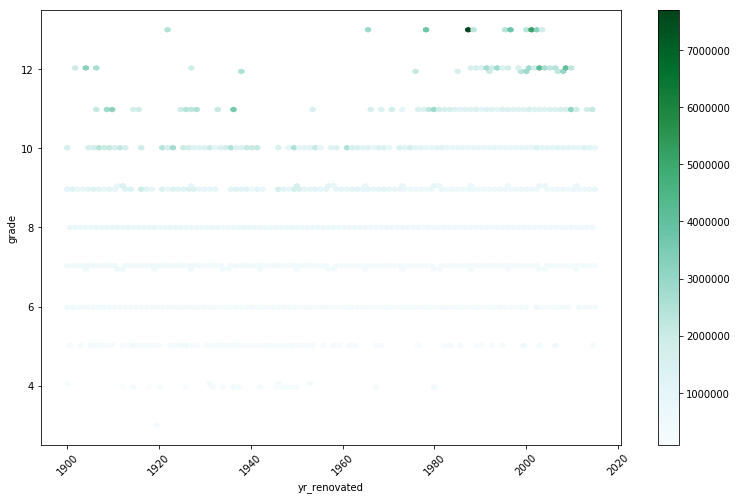

In [5]:
dff.plot.hexbin(x='yr_renovated', y='grade', C='price', figsize=(13,8),sharex=False, rot=45, legend=True)

In the hexbin plot above: 
- it appears that as the __*grade*__ of the house increases, the __*price*__ of the house also increases.
- It also appears that the __*yr_renovated*__ does not have much impact on the grade.

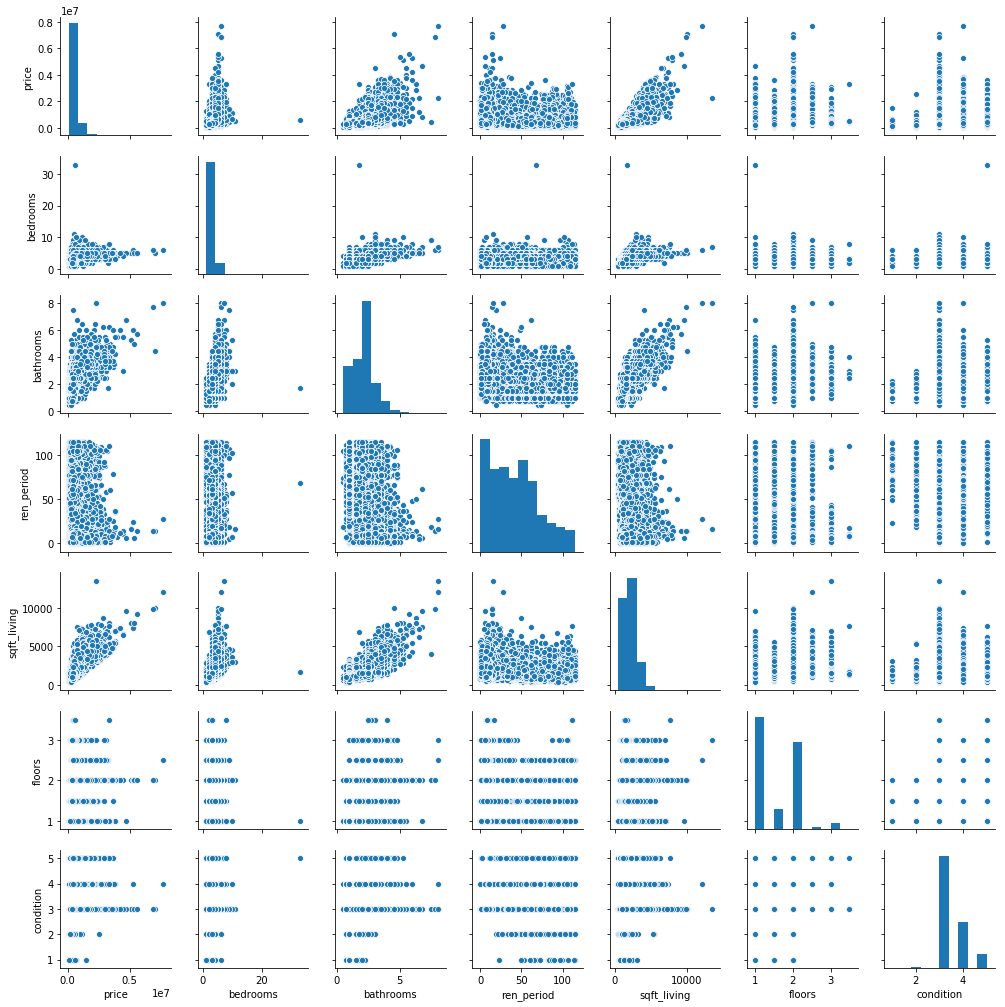

In [6]:
hf.make_pairplot(df=dff)

In the above pairplot, the following observations were made:
- __*bedrooms*__ seems to have a relationship with __*price,sqft_living, and bathrooms*__.
- __*sqft_lliving*__ and __*price*__ seem to have a linear relationship
- __*sqft_living and bathrooms*__ seem to have a direct correlation to each other.
- there are a few outliers that appear to be skewing the data, we will need to remove those.

#### Outliers have been identified and we will remove those for analysis
- __*bathrooms*__ above 10
- __*bedrooms*__ above 10
- __*sqft_living*__ above 10000
- __*grade*__ of 13 which is a top of the line custom home.  
- __*sqft_lot*__ above 750000

In [7]:
dff_working = dff.loc[
                      (dff['bathrooms']< 10) & 
                      (dff['bedrooms']<10) & 
                      (dff['sqft_living']<10000) & 
                      (dff['grade']<13) &
                      (dff['sqft_lot']<750000)
                      ]

In [8]:
dff_working.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,ren_period,yr_renovated_dt,date_dt
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1955,1955.0,98178,47.5112,-122.257,1340,5650,60.0,1955,2014-10-13
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,24.0,1991,2014-12-09
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,1933,1933.0,98028,47.7379,-122.233,2720,8062,82.0,1933,2015-02-25
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1965,1965.0,98136,47.5208,-122.393,1360,5000,50.0,1965,2014-12-09
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1987,1987.0,98074,47.6168,-122.045,1800,7503,28.0,1987,2015-02-18


In [9]:
dff_working.drop('yr_renovated', inplace=True, axis=1)

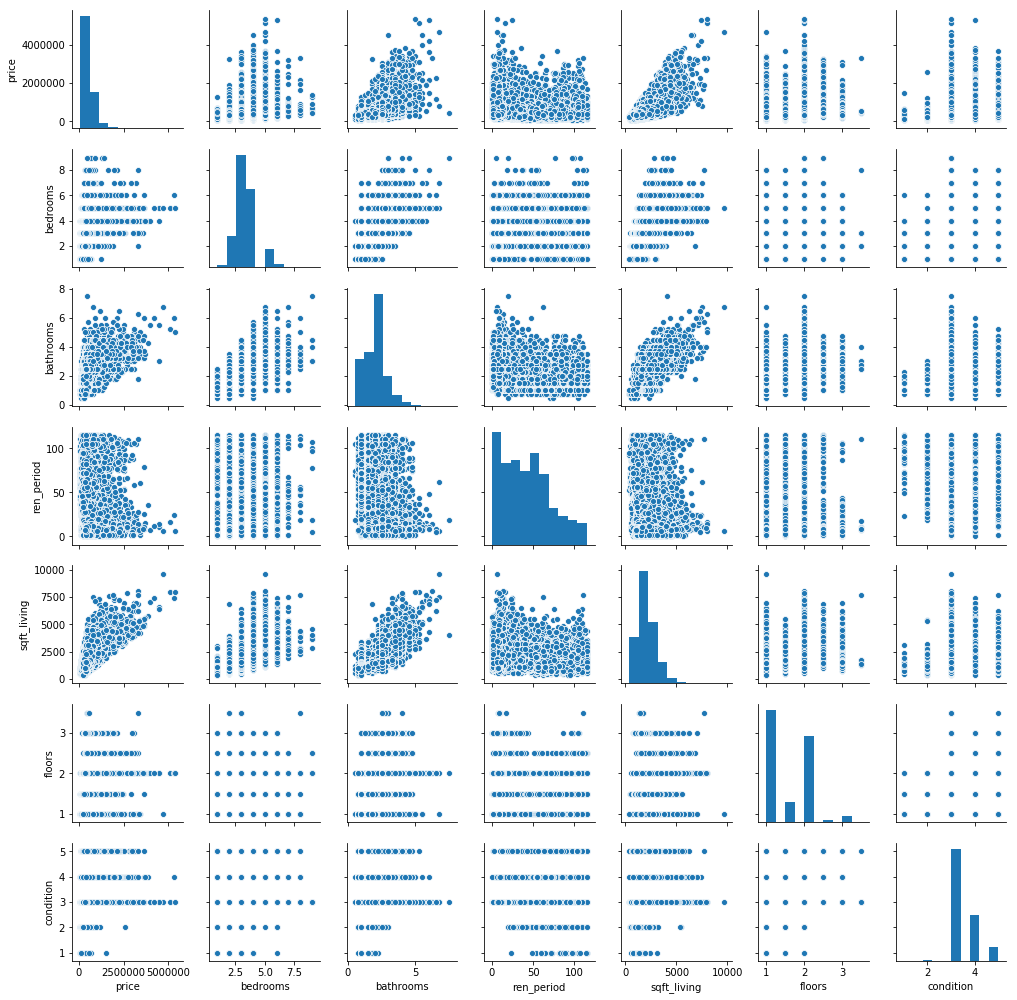

In [10]:
hf.make_pairplot(df=dff_working, kind='scatter')

#### It appears that the cleaning we have done was successful.<br>


Text(0.5, 1.0, 'Price vs 1st group of column variables')

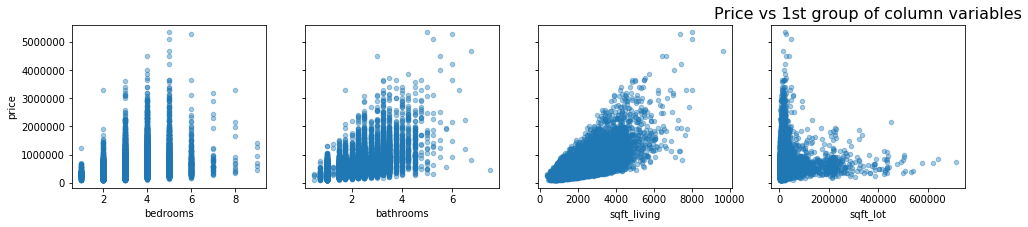

In [11]:

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax in zip(list(dff_working)[2:6], axes):
                    dff_working.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=.4, sharey=True)
        

plt.title('Price vs 1st group of column variables', fontsize = 16)


Text(0.5, 1.0, 'Price vs 2nd group of column variables')

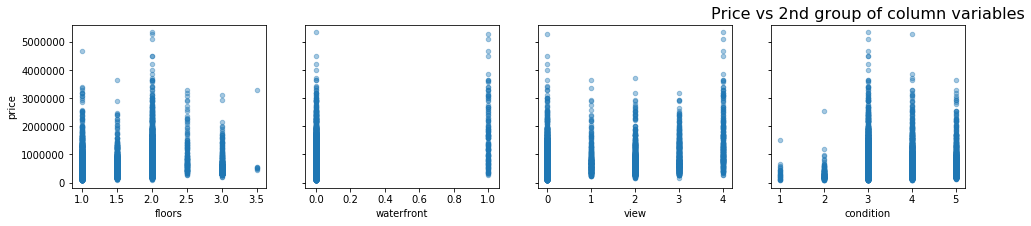

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax in zip(list(dff_working)[6:10], axes):
                    dff_working.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=.4, sharey=True)

plt.title('Price vs 2nd group of column variables', fontsize = 16)

Text(0.5, 1.0, 'Price vs 3rd group of column variables')

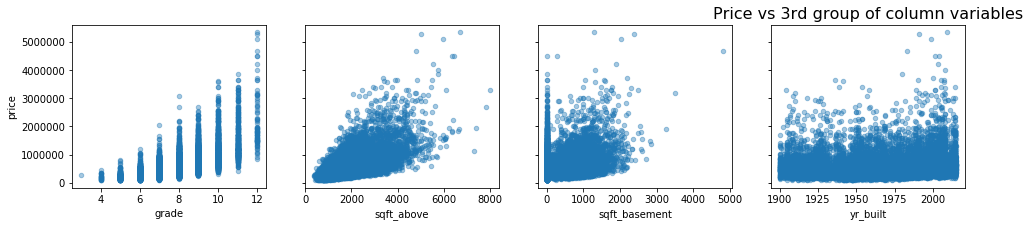

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax in zip(list(dff_working)[10:14], axes):
                    dff_working.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=.4, sharey=True)

plt.title('Price vs 3rd group of column variables', fontsize = 16)

Text(0.5, 1.0, 'Price vs 4th group of column variables')

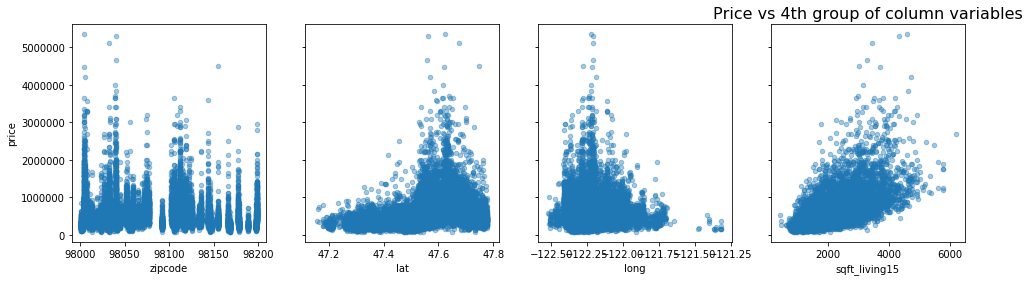

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,4))
for xcol, ax in zip(list(dff_working)[14:18], axes):
                    dff_working.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=.4, sharey=True)

plt.title('Price vs 4th group of column variables', fontsize = 16)

Latitude and longitude seem to be related.  Let's plot them together to see what it looks like.

Text(0.5, 1.0, 'Price by Location')

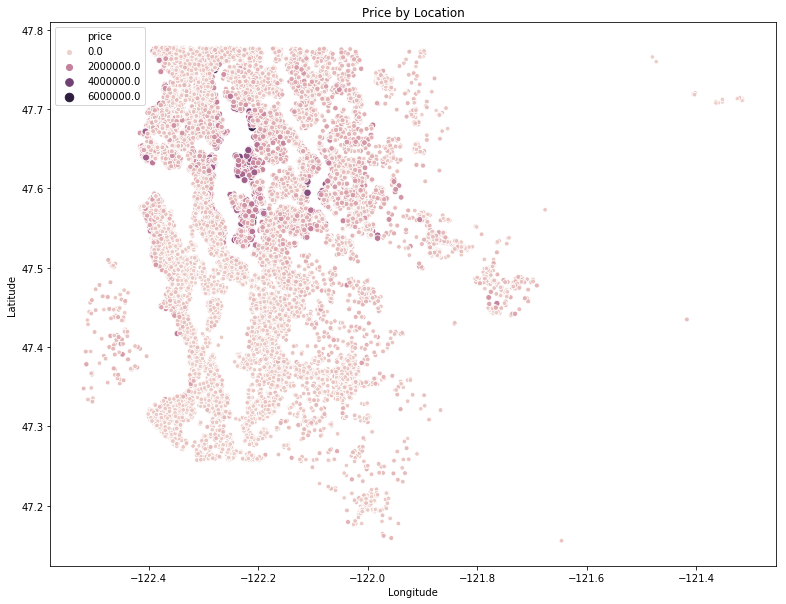

In [15]:
plt.figure(figsize=(13,10))
cmap = sns.cubehelix_palette(8, start=2, rot=.2, dark=0, light=.95, as_cmap=True)
sns.scatterplot(x='long', y='lat', data=dff_working, hue='price', size='price', cmap=cmap, )
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Price by Location')


This plot seems to indicate that there is an area where high priced houses are concentrated.
We will use this information later.


### Looking at the plots above, we have determined that we will look further into:
- __*bathrooms*__
- __*sqft_living*__
- __*bedrooms*__
- __*lat & long*__ <br>
as they relate to our target __*price*__

### Now to check for Mulitcolilnearity
 using the Pearson test, we can look for high correlation between two variables<br>
 to determine if they represent the same data.<br> 
 We will look at the values at 75% or higher and determine if we should drop one 

In [16]:
dff_working.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,ren_period,yr_renovated_dt
price,1.000000,0.317376,0.519632,0.693977,0.091514,0.260031,0.266125,0.393171,0.039827,0.670599,0.596420,0.311363,0.055809,-0.054197,0.315598,0.023194,0.591711,0.076440,-0.096550,0.096550
bedrooms,0.317376,1.000000,0.527331,0.596392,0.037498,0.182676,-0.002881,0.077620,0.023567,0.366299,0.493481,0.299739,0.163283,-0.159273,-0.012497,0.138257,0.405160,0.030910,-0.170622,0.170622
bathrooms,0.519632,0.527331,1.000000,0.751920,0.091040,0.503419,0.062941,0.179000,-0.126445,0.662665,0.681701,0.269617,0.511009,-0.206178,0.022462,0.226361,0.568086,0.080268,-0.534786,0.534786
sqft_living,0.693977,0.596392,0.751920,1.000000,0.187129,0.354461,0.102499,0.274899,-0.058659,0.761580,0.873471,0.420162,0.323367,-0.202875,0.050302,0.245231,0.759930,0.177735,-0.342120,0.342120
sqft_lot,0.091514,0.037498,0.091040,0.187129,1.000000,-0.012617,0.027021,0.076750,-0.008012,0.124042,0.197871,0.015267,0.062184,-0.144183,-0.098084,0.251453,0.167917,0.769846,-0.061805,0.061805
floors,0.260031,0.182676,0.503419,0.354461,-0.012617,1.000000,0.020441,0.026420,-0.264060,0.459059,0.526030,-0.246795,0.490039,-0.059873,0.048940,0.126034,0.279570,-0.016462,-0.500922,0.500922
waterfront,0.266125,-0.002881,0.062941,0.102499,0.027021,0.020441,1.000000,0.382324,0.017052,0.082448,0.069358,0.081469,-0.023990,0.029794,-0.012546,-0.037760,0.083052,0.032995,0.007433,-0.007433
view,0.393171,0.077620,0.179000,0.274899,0.076750,0.026420,0.382324,1.000000,0.046554,0.244571,0.157663,0.267223,-0.055474,0.085810,0.005458,-0.078659,0.275711,0.069054,0.027979,-0.027979
condition,0.039827,0.023567,-0.126445,-0.058659,-0.008012,-0.264060,0.017052,0.046554,1.000000,-0.146479,-0.159193,0.170079,-0.361615,0.002788,-0.014726,-0.105477,-0.092676,-0.001633,0.390179,-0.390179
grade,0.670599,0.366299,0.662665,0.761580,0.124042,0.459059,0.082448,0.244571,-0.146479,1.000000,0.753483,0.158725,0.450088,-0.187119,0.112796,0.201212,0.712925,0.116239,-0.460517,0.460517


In [17]:
abs(dff_working.corr()) >.75


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,ren_period,yr_renovated_dt
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False


- It looks like 'grade' is correlated with 'sqft_living', but this relationship should be expected
- 'bathrooms' and 'sqft_living15' seem to be correlated.  
  upon further inspection it seems to indicate that 'sqft_living15' may be the size before remodeling and sqft_living is the current size.  
  We will look at this closer  
- It looks like 'lat' and 'long' may have some importance, but they need to be used together.  
  We will separate them out for further inspection.

In [18]:
dff_working.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21566 entries, 0 to 21596
Data columns (total 22 columns):
date               21566 non-null object
price              21566 non-null float64
bedrooms           21566 non-null int64
bathrooms          21566 non-null float64
sqft_living        21566 non-null int64
sqft_lot           21566 non-null int64
floors             21566 non-null float64
waterfront         21566 non-null float64
view               21566 non-null float64
condition          21566 non-null int64
grade              21566 non-null int64
sqft_above         21566 non-null int64
sqft_basement      21566 non-null float64
yr_built           21566 non-null int64
zipcode            21566 non-null int64
lat                21566 non-null float64
long               21566 non-null float64
sqft_living15      21566 non-null int64
sqft_lot15         21566 non-null int64
ren_period         21566 non-null float64
yr_renovated_dt    21566 non-null int64
date_dt            21566 non-nul

In [19]:
cols = ['bedrooms', 'bathrooms', 'ren_period', 'sqft_living', 'floors', 'condition']
hf.make_ols_model(df=dff_working, columns_to_use=cols, summary=True)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                 2.163e+04
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        07:55:42   Log-Likelihood:            -2.9802e+05
No. Observations:               21566   AIC:                         5.961e+05
Df Residuals:                   21560   BIC:                         5.961e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bedrooms    -8.311e+04   2236.572    -37.160      

(<statsmodels.regression.linear_model.OLS at 0x262a4ccaa90>,
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x262a4c53908>)

### Summary 1: All Columns
- Model
    - R2 is .85
        - but given the **multicollinearity** this number is highly unreliable
- Features
    - Our coefficients are also unreliable, since we have such high multicollinearity
    - Pvalues are all under 0.05
- Residuals
    - Skewed to the right, which means our line is below our data
    - Kurtosis is very high, which means our data is far away (35 standard deviations) from the line
    - Condition Number is infinity, which means we have multicollinearity

In [20]:
cols = ['grade', 'lat', 'condition']

hf.make_ols_model(df=dff_working, columns_to_use=cols, summary=True)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                 3.728e+04
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        07:55:44   Log-Likelihood:            -2.9938e+05
No. Observations:               21566   AIC:                         5.988e+05
Df Residuals:                   21563   BIC:                         5.988e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
grade       2.084e+05   1532.464    135.990      0.0

(<statsmodels.regression.linear_model.OLS at 0x262a425e160>,
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x262a425e0b8>)

### Summary 2: Grade, Latitude and Condition
- Model
    - R2 is .83
        - but given the **multicollinearity** this number is highly unreliable
- Features
    - Our coefficients are also unreliable, since we have such high multicollinearity
    - Pvalues are all under 0.05
- Residuals
    - Still skewed to the right, which means our line is below our data
    - Kurtosis is very high, which means our data is far away (25 standard deviations) from the line
    - Condition Number is much better, but we still have multicollinearity

In [21]:
cols = ['waterfront', 'lat', 'bedrooms', 'condition']

hf.make_ols_model(df=dff_working, columns_to_use=cols, summary=True)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                 1.624e+04
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        07:55:46   Log-Likelihood:            -3.0405e+05
No. Observations:               21566   AIC:                         6.081e+05
Df Residuals:                   21562   BIC:                         6.081e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
waterfront  1.152e+06   2.68e+04     43.040      0.0

(<statsmodels.regression.linear_model.OLS at 0x262a4d367f0>,
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x262a4d367b8>)

### Summary 3: Waterfront, Latitude, Bedrooms, Condition
- Model
    - R2 is .75
        - but given the **multicollinearity** this number is highly unreliable
- Features
    - Our coefficients are also unreliable, since we have such high multicollinearity
    - Pvalues are all under 0.05
- Residuals
    - Still skewed to the right, which means our line is below our data
    - Kurtosis is still high, which means our data is far away (18 standard deviations) from the line
    - Condition Number is much worse, and we still have multicollinearity

In [22]:
cols = ['lat', 'long', 'grade']

hf.make_ols_model(df=dff_working, columns_to_use=cols, summary=True)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 3.926e+04
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        07:55:48   Log-Likelihood:            -2.9891e+05
No. Observations:               21566   AIC:                         5.978e+05
Df Residuals:                   21563   BIC:                         5.979e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lat         4.922e+05   1.24e+04     39.799      0.0

(<statsmodels.regression.linear_model.OLS at 0x262a4cdba58>,
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x262a4cdbba8>)

### Summary 4: Latitude, Longitude, Grade
- Model
    - R2 is .84
        - but given the **multicollinearity** this number is highly unreliable
- Features
    - Our coefficients are also unreliable, since we have such high multicollinearity
    - Pvalues are all under 0.05
- Residuals
    - Still skewed to the right, which means our line is below our data
    - Kurtosis is much higher, which means our data is far away (29 standard deviations) from the line
    - Condition Number is very large because we still have multicollinearity

### Looking for and removing Multi_Colinearity

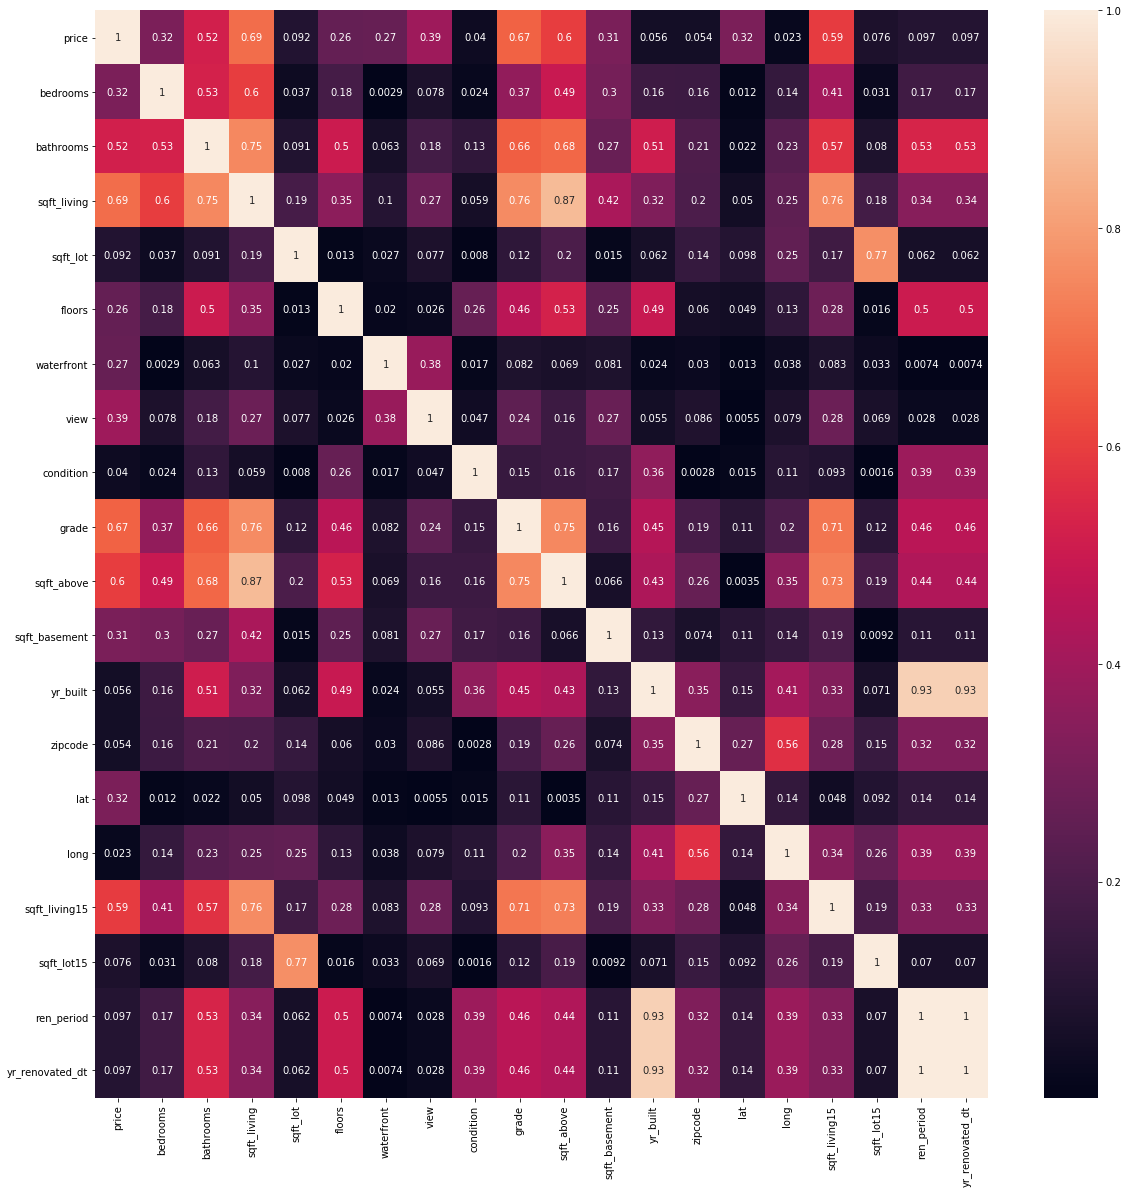

In [23]:
corr = dff_working.corr()
plt.figure(figsize=(20,20))
sns.heatmap(np.abs(corr), annot=True,)
plt.show()

In the heatmap above we can see that there are a few features that are multicolinear with many others.  
We will attempt to engineer some features from those to see if they can still be effective.  
'sqft_living' and 'grade' have a high correlation, so we will combine them into one feature.

In [24]:
np.corrcoef(dff_working.bedrooms, dff_working.sqft_living)

array([[1.        , 0.59639237],
       [0.59639237, 1.        ]])

In [25]:
weights = np.linspace(0, 1, 10000)
max_corr = -1
desired_weights = None
for weight in weights:
    weight1 = weight
    weight2 = 1 - weight
    vals = weight1*dff_working.bedrooms + weight2*dff_working.sqft_living
    corr_coeff = np.abs(np.corrcoef(vals, dff_working.price))[0][1]
    if corr_coeff > max_corr:
        desired_weights = [weight1, weight2]
        max_corr = corr_coeff
desired_weights

[0.0, 1.0]

In [26]:
dff_working['sqft_living_bedrooms'] = desired_weights[0]*dff_working.bedrooms + desired_weights[1]*dff_working.sqft_living

In [27]:
cols = ['sqft_living_bedrooms']
hf.make_ols_model(df=dff_working, columns_to_use=cols, summary=True)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                 1.162e+05
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        07:56:06   Log-Likelihood:            -2.9904e+05
No. Observations:               21566   AIC:                         5.981e+05
Df Residuals:                   21565   BIC:                         5.981e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
sqft_living_bedrooms   261.1745 

(<statsmodels.regression.linear_model.OLS at 0x262a4056550>,
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x262a4056128>)

In [28]:
np.corrcoef(dff_working.bathrooms, dff_working.grade)

array([[1.        , 0.66266476],
       [0.66266476, 1.        ]])

__*bathrooms*__ and __*grade*__ are colinear, so we will create a new feature combining the  
two into one feature, __*grade_bathroom*__.


In [29]:
weights = np.linspace(0, 1, 10000)
max_corr = -1
desired_weights = None
for weight in weights:
    weight1 = weight
    weight2 = 1 - weight
    vals = weight1*dff_working.bathrooms + weight2*dff_working.grade
    corr_coeff = np.abs(np.corrcoef(vals, dff_working.price))[0][1]
    if corr_coeff > max_corr:
        desired_weights = [weight1, weight2]
        max_corr = corr_coeff
desired_weights

[0.26042604260426044, 0.7395739573957396]

In [30]:
dff_working['grade_bathroom'] = desired_weights[0]*dff_working.bathrooms + desired_weights[1]*dff_working.grade

In [31]:
dff_working.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21566 entries, 0 to 21596
Data columns (total 24 columns):
date                    21566 non-null object
price                   21566 non-null float64
bedrooms                21566 non-null int64
bathrooms               21566 non-null float64
sqft_living             21566 non-null int64
sqft_lot                21566 non-null int64
floors                  21566 non-null float64
waterfront              21566 non-null float64
view                    21566 non-null float64
condition               21566 non-null int64
grade                   21566 non-null int64
sqft_above              21566 non-null int64
sqft_basement           21566 non-null float64
yr_built                21566 non-null int64
zipcode                 21566 non-null int64
lat                     21566 non-null float64
long                    21566 non-null float64
sqft_living15           21566 non-null int64
sqft_lot15              21566 non-null int64
ren_period         

In [32]:
dff_working = dff_working.drop('date_dt', axis=1)
dff_working = dff_working.drop('date', axis=1)



Here we are using scikit learn's recursive feature elimination to help  
determine which features to select for our model.

In [59]:
sel = RFE(estimator=LinearRegression(), n_features_to_select=4)
sel = sel.fit(test_features, dff_working['price'])
estimator = sel.estimator_

features_ranked = zip(test_features.columns,sel.ranking_)
sorted_features = sorted(features_ranked, key=lambda tup: tup[1])

#Iterate through sorted features and print their rank
for col, rank in sorted_features:
    print("{}. {}".format(rank,col))

1. waterfront
1. condition
1. ren_period
1. grade_bathroom
2. sqft_living_bedrooms
3. sqft_basement
4. sqft_lot


In [60]:
cols = ['bathrooms', 'waterfront', 'ren_period']
model, results = hf.make_ols_model(df=dff_working, columns_to_use=cols, summary=True)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                 2.941e+04
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:33:17   Log-Likelihood:            -3.0148e+05
No. Observations:               21566   AIC:                         6.030e+05
Df Residuals:                   21563   BIC:                         6.030e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bathrooms   2.267e+05   1169.827    193.769      0.0

After running a few models, taking out and including various features, we have settled on the following:  
__*'sqft_lot', 'waterfront', 'condition', 'sqft_basement', 'ren_period', sqft_living_bedrooms', 'grade_bathroom'

In [61]:
features = dff_working.drop(columns=['bedrooms', 'bathrooms', 'view', 'grade', 'sqft_living', 'floors', 'sqft_above', 'sqft_lot15', 'yr_built', 'yr_renovated_dt', 'sqft_living15', 'lat', 'long', 'zipcode'])
features.head()

,price,sqft_lot,waterfront,condition,sqft_basement,ren_period,sqft_living_bedrooms,grade_bathroom
0,221900.0,5650,0.0,3,0.0,60.0,1180.0,5.437444
1,538000.0,7242,0.0,3,400.0,24.0,2570.0,5.762976
2,180000.0,10000,0.0,3,0.0,82.0,770.0,4.697870
3,604000.0,5000,0.0,5,910.0,50.0,1960.0,5.958296
4,510000.0,8080,0.0,3,0.0,28.0,1680.0,6.437444


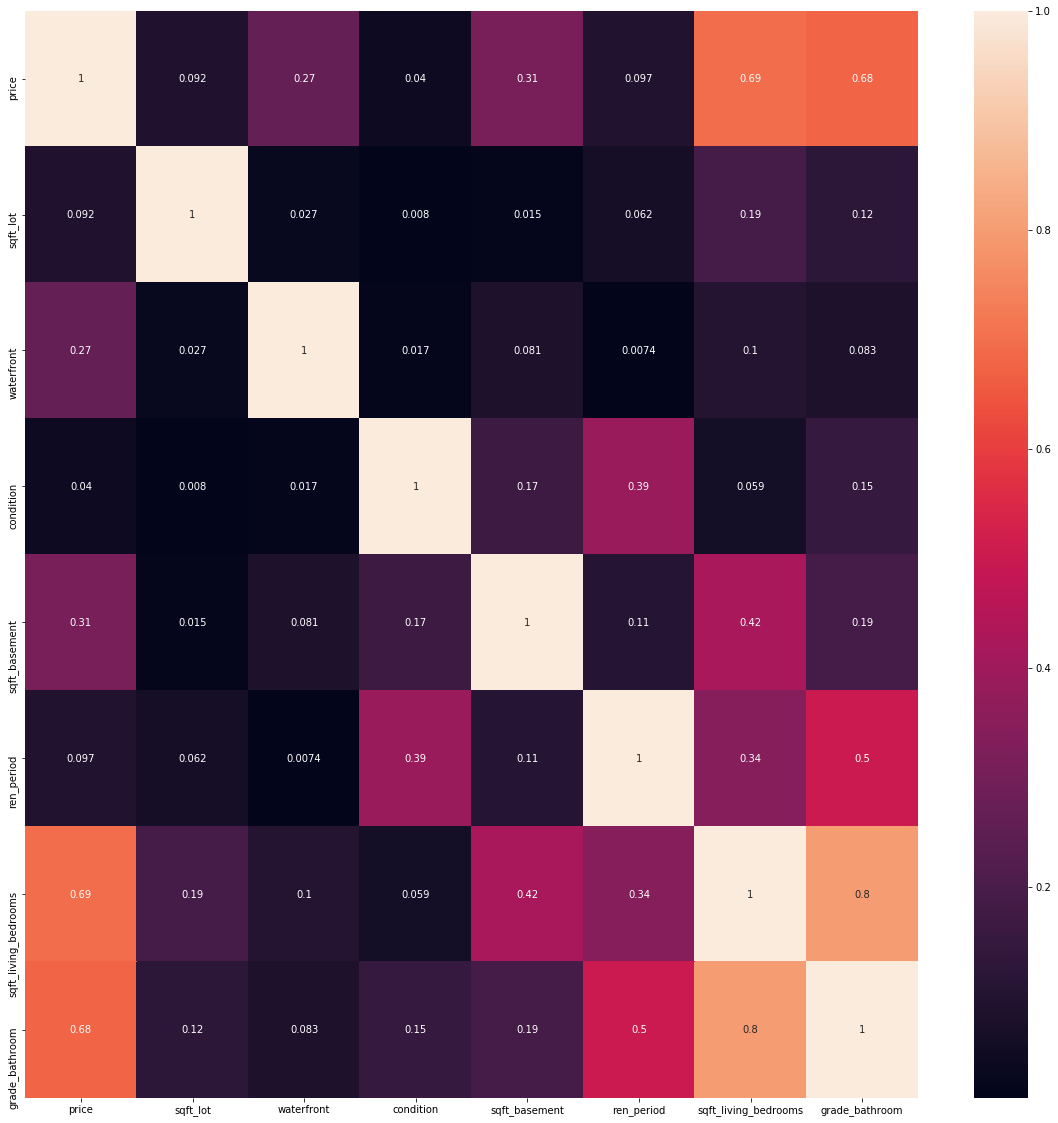

In [62]:
corr = features.corr()
plt.figure(figsize=(20,20))
sns.heatmap(np.abs(corr), annot=True,)
plt.show()

From this correlation heatmap, it appears that we were successful in removing much of  
the multicolinearity.

In [65]:
cols = ['ren_period', 'grade_bathroom', 'condition']
hf.make_ols_model(df=features, target='price', columns_to_use=cols, summary=True)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                 2.821e+04
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        08:40:46   Log-Likelihood:            -3.0184e+05
No. Observations:               21566   AIC:                         6.037e+05
Df Residuals:                   21563   BIC:                         6.037e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
ren_period      1341.4915     79.748     16.

(<statsmodels.regression.linear_model.OLS at 0x262a3f7eb70>,
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x262b25af048>)

Lets take a look at a graph of our selected features.

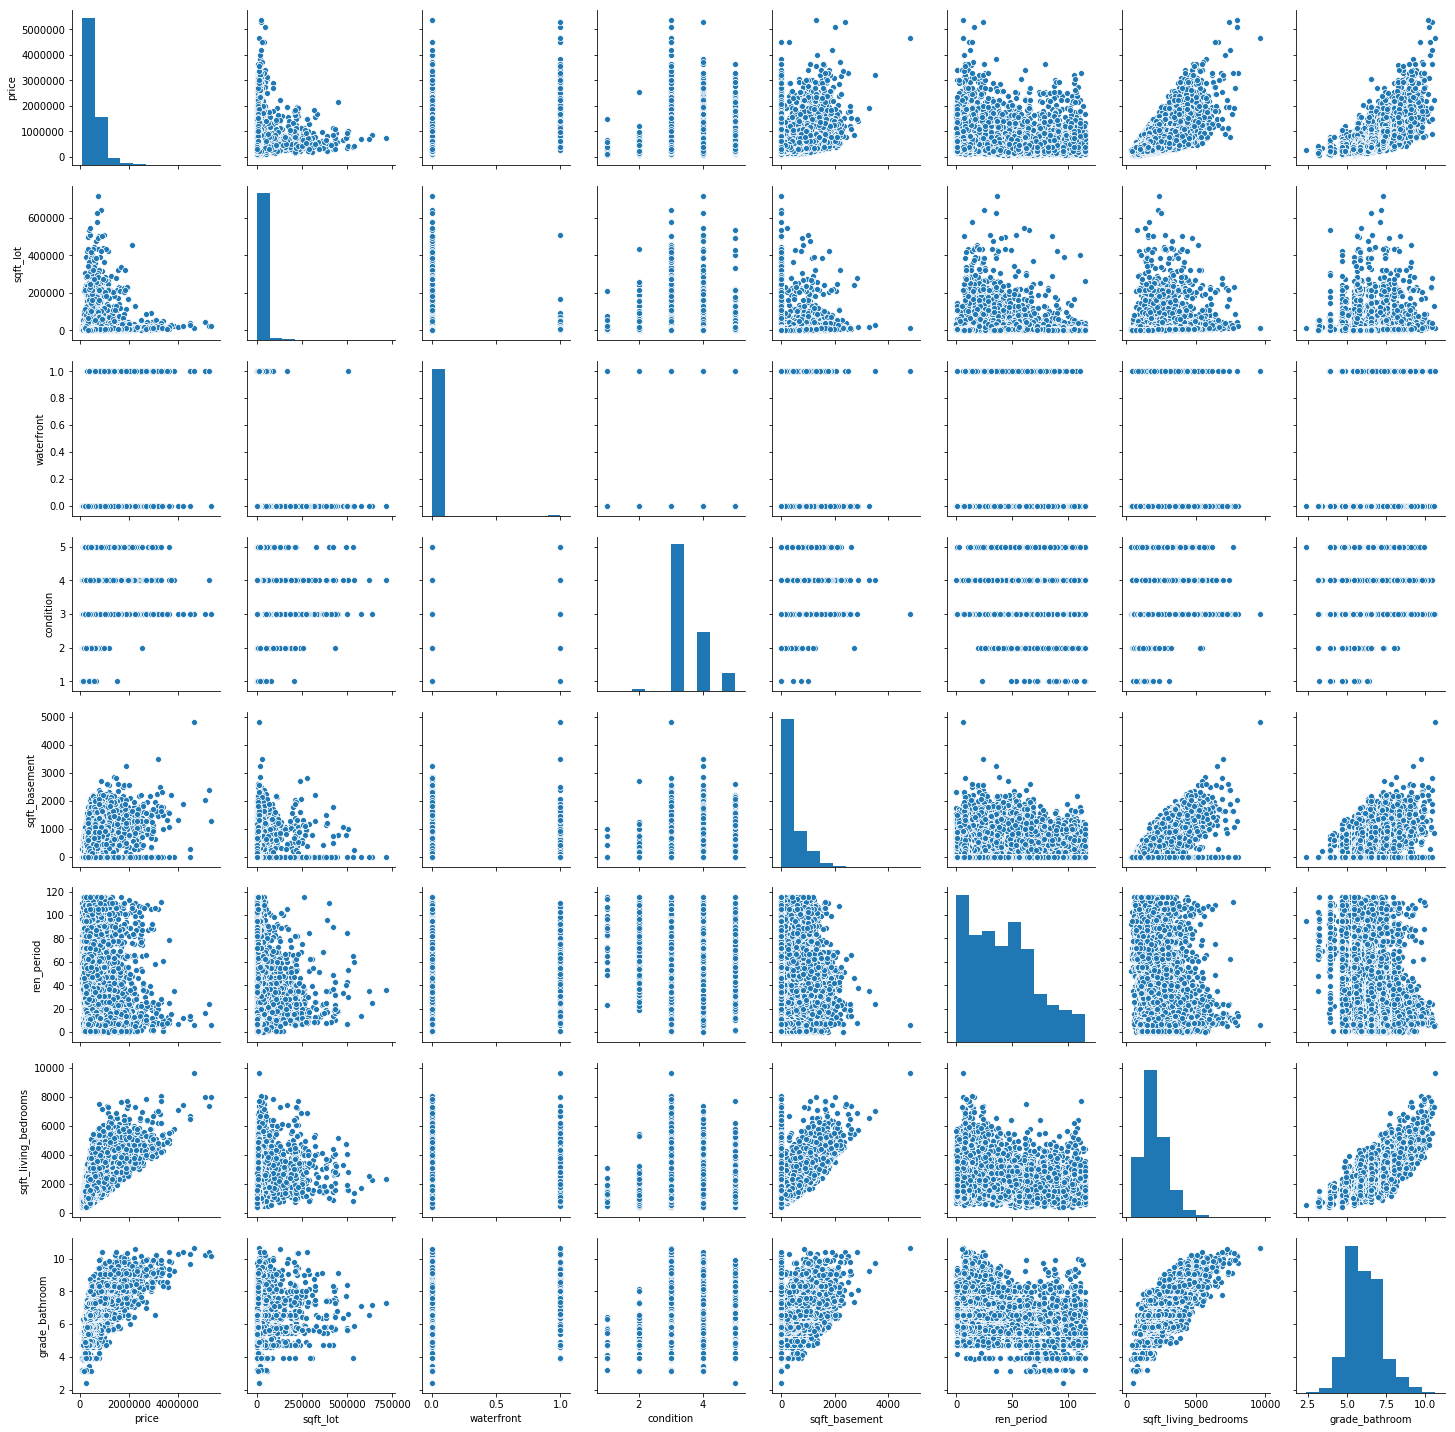

In [66]:
sns.pairplot(data=features)

In [67]:
# Much of the data seems to be not normal.  
# We will perform a log transformation in an effort to normalize the data
features_treated = pd.DataFrame([])

In [68]:
features_treated['price'] = np.log(features['price'])
features_treated['sqft_lot'] = np.log(features['sqft_lot'])
features_treated['sqft_living_bedrooms'] = np.log(features['sqft_living_bedrooms'])
features_treated['grade_bathroom'] = np.log(features['grade_bathroom'])

Text(0.5, 1.0, 'Price vs 1st group of column variables')

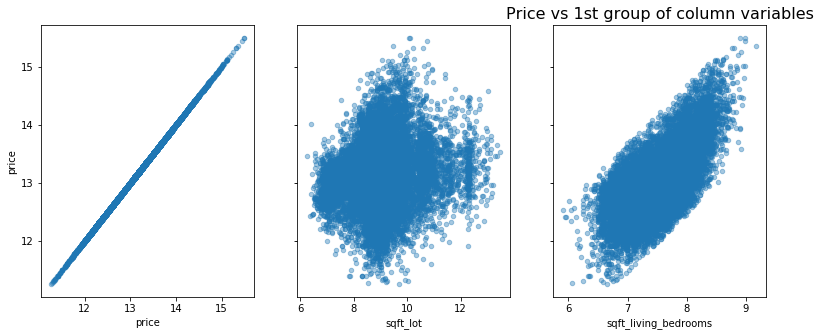

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13,5))
for xcol, ax in zip(list(features_treated)[0:3], axes):
                    features_treated.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=.4, sharey=True)

plt.title('Price vs 1st group of column variables', fontsize = 16)

In [70]:
features_treated['sqft_basement'] = (features.sqft_basement - min(features.sqft_basement)) / (max(features.sqft_basement) - min(features.sqft_basement))

#### This seems to have made a difference in the data.

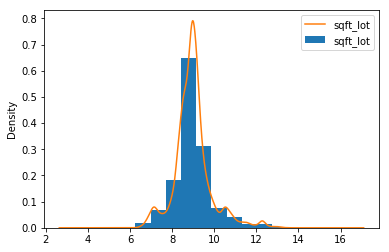

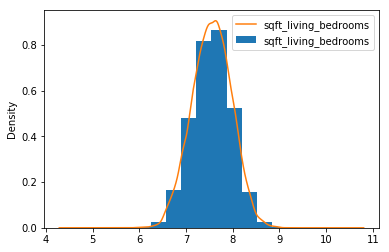

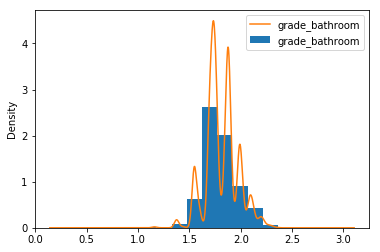

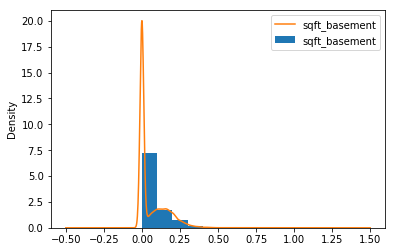

In [75]:
cols = ['sqft_lot', 'sqft_living_bedrooms', 'grade_bathroom', 'sqft_basement']
hf.make_kde(data=features_treated, columns=cols)

### From this plot, we have learned<br>
- We were able to normalize the data.


In [76]:
features_final = pd.DataFrame()
cols = ['price','sqft_lot', 'sqft_living_bedrooms', 'grade_bathroom', 'sqft_basement']
for col in cols:
    features_final[col] = features_treated[col]
features_final.head()

,price,sqft_lot,sqft_living_bedrooms,grade_bathroom,sqft_basement
0,12.309982,8.639411,7.073270,1.693309,0.000000
1,13.195614,8.887653,7.851661,1.751454,0.082988
2,12.100712,9.210340,6.646391,1.547109,0.000000
3,13.311329,8.517193,7.580700,1.784785,0.188797
4,13.142166,8.997147,7.426549,1.862132,0.000000


In [77]:
features_final['ren_period'] = features['ren_period']
features_final['condition'] = features['condition']


### Now that we have the data organized, lets start looking at the relationships.

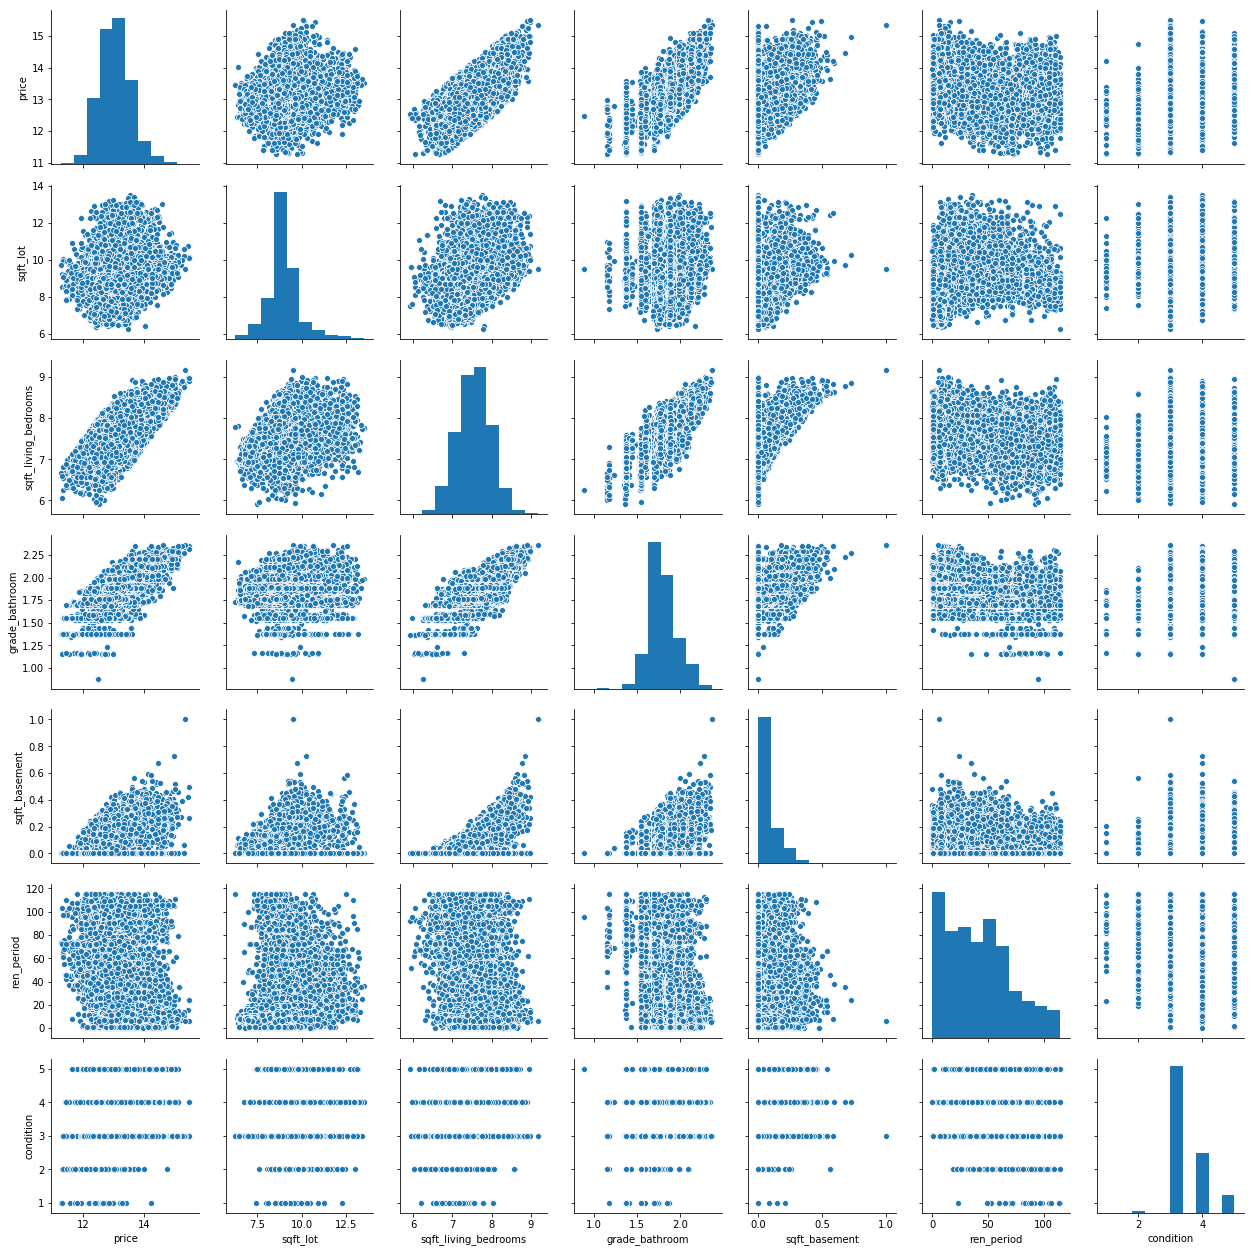

In [78]:
sns.pairplot(features_final)

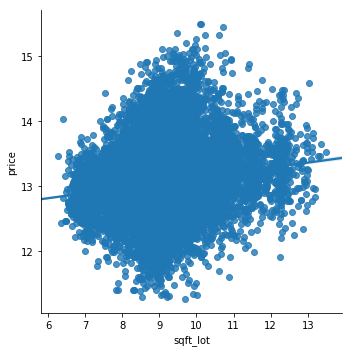

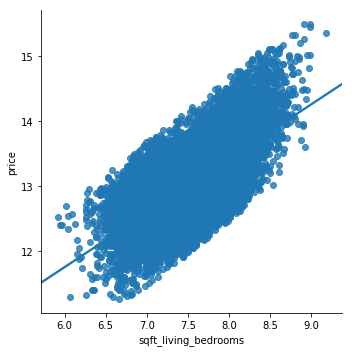

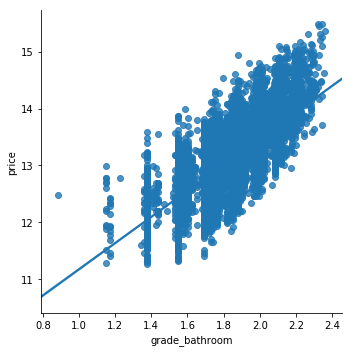

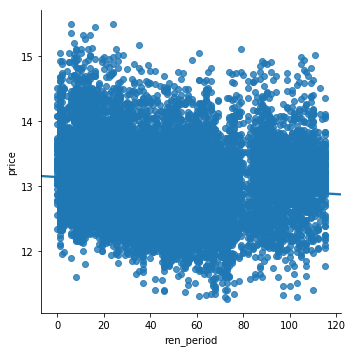

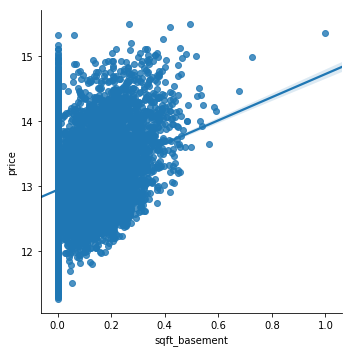

In [79]:
for column in ['sqft_lot', 'sqft_living_bedrooms', 'grade_bathroom', 'ren_period', 'sqft_basement']:
    sns.lmplot(x=column, y="price",
                  data=features_final)
    plt.show()

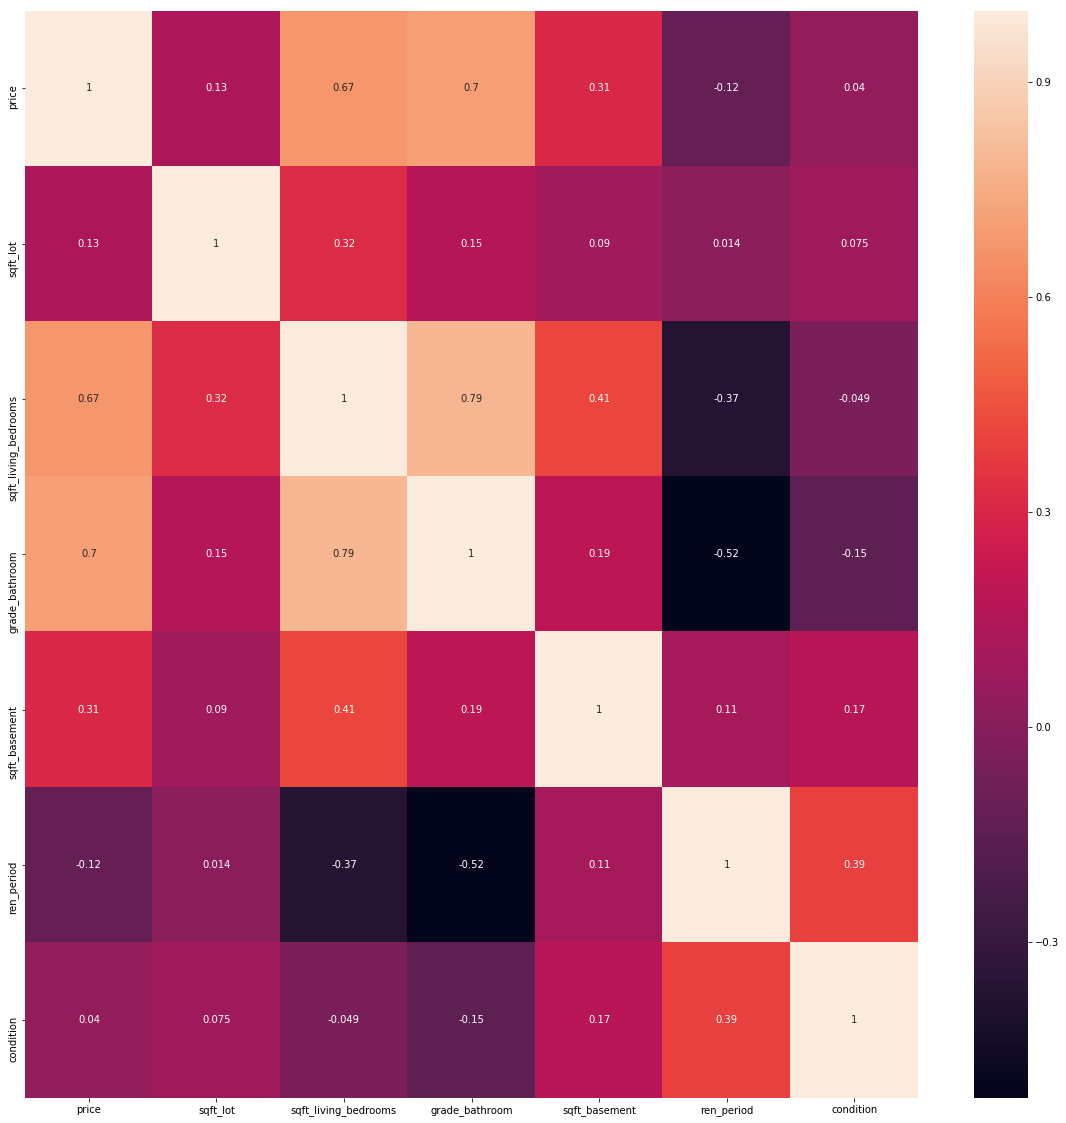

In [80]:
corr = features_final.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True,)
plt.show()

In [81]:
features_final.head()

,price,sqft_lot,sqft_living_bedrooms,grade_bathroom,sqft_basement,ren_period,condition
0,12.309982,8.639411,7.073270,1.693309,0.000000,60.0,3
1,13.195614,8.887653,7.851661,1.751454,0.082988,24.0,3
2,12.100712,9.210340,6.646391,1.547109,0.000000,82.0,3
3,13.311329,8.517193,7.580700,1.784785,0.188797,50.0,5
4,13.142166,8.997147,7.426549,1.862132,0.000000,28.0,3


In [82]:
col_names = features_final.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("Price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=features_final).fit()
    X_new = pd.DataFrame({val: [features_final[val].min(), features_final[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1]])
    print (results[idx+1])

Price~sqft_lot
------------------------------
['sqft_lot', 0.01776913784845291, 12.345547832711205, 0.07799260152670728, 4.5279825269091326e-86]
Price~sqft_living_bedrooms
------------------------------
['sqft_living_bedrooms', 0.45122549562539416, 6.758188085524836, 0.8329451275649388, 0.0]
Price~grade_bathroom
------------------------------
['grade_bathroom', 0.4867640027310691, 8.86865737259595, 2.3035603090989305, 0.0]
Price~sqft_basement
------------------------------
['sqft_basement', 0.09475698122496534, 12.941402440517544, 1.7786531756918782, 0.0]
Price~ren_period
------------------------------
['ren_period', 0.014538635135167843, 13.13821995112877, -0.002182037155658314, 1.1875365265727518e-70]
Price~condition
------------------------------
['condition', 0.0016192391585556631, 12.935958532050405, 0.03239507765393057, 3.391924266123497e-09]


In [85]:
cols = ['grade_bathroom', 'condition']
model, results = hf.make_ols_model(features_final, columns_to_use=cols)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 3.531e+06
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        09:31:17   Log-Likelihood:                -23530.
No. Observations:               21566   AIC:                         4.706e+04
Df Residuals:                   21564   BIC:                         4.708e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
grade_bathroom     6.0017      0.012    483.684      0.000       5.977       6.026
condition          0.6204      0.007     95.343      0.000       0.608       0.633
==============================================================================
Omnibus:                     1179.066   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1819.101
Skew:                           0.471   Prob(JB):                         0.00
Kurtosis:                       4.067   Cond. No.                         11.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
y = features_final[['price']]
X = features_final.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

In [87]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

17252 4314 17252 4314


In [88]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [89]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [90]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: price    0.108758
dtype: float64
Test Mean Squarred Error: price    0.108777
dtype: float64


In [91]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [92]:
print(linreg.intercept_)

[6.54764283]


In [93]:
y_pred = linreg.predict(X_test)

In [94]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.25749462186551286
0.1087773812200905
0.32981416164272037


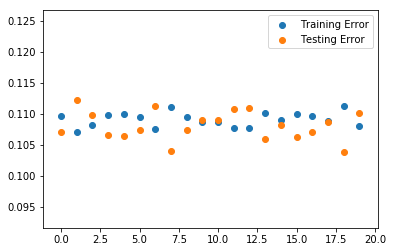

In [95]:
num = 20
train_err = []
test_err = []
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(metrics.mean_squared_error(y_train, y_hat_train))
    test_err.append(metrics.mean_squared_error(y_test, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.legend();

In [96]:
cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))

In [97]:
print(cv_5_results)

-0.10925821457982052


In [98]:
print(cv_10_results)

-0.10914009208963697


In [99]:
print(cv_20_results)

-0.10896086908951808
